In [30]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [32]:
from google.colab import files
myfile = files.upload()
data = pd.read_csv('women_track_records.csv')
data.head()
#X1 = 100M(s), X2 = 200M(s), X3 = 400M(s), X4 = 800M(min), X5 = 1500M(min), X6 = 3000M(min), X7 = Marathon(min)

Saving women_track_records.csv to women_track_records (1).csv


,COUNTRY,X1,X2,X3,X4,X5,X6,X7
0,Argentina,11.61,22.94,54.50,2.15,4.43,9.79,178.52
1,Australia,11.20,22.35,51.80,1.98,4.13,9.08,152.37
2,Austria,11.43,23.09,50.62,1.99,4.22,9.34,159.37
3,Belgium,11.41,23.04,52.00,2.00,4.14,8.88,157.85
4,Bermuda,11.46,23.05,53.30,2.16,4.58,9.81,169.98


In [33]:
data2= data.drop(data.iloc[:,:1], axis=1)
data2.dropna(inplace=True)
data2

,X1,X2,X3,X4,X5,X6,X7
0,11.61,22.94,54.50,2.15,4.43,9.79,178.52
1,11.20,22.35,51.80,1.98,4.13,9.08,152.37
2,11.43,23.09,50.62,1.99,4.22,9.34,159.37
3,11.41,23.04,52.00,2.00,4.14,8.88,157.85
4,11.46,23.05,53.30,2.16,4.58,9.81,169.98
5,11.31,23.17,52.80,2.10,4.49,9.77,168.75
6,12.14,24.47,55.00,2.18,4.45,9.51,191.02
7,11.00,22.25,50.60,2.00,4.06,8.81,149.45
8,12.00,21.52,54.90,2.05,4.23,9.37,171.38
9,11.95,24.41,54.97,2.08,4.33,9.31,168.48


In [34]:
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(data2), columns=data2.columns, index = data2.index)
data_scale

,X1,X2,X3,X4,X5,X6,X7
0,-0.022443,-0.562237,0.300209,0.686677,0.080687,0.393984,0.174496
1,-0.942600,-1.081287,-0.611097,-0.898615,-0.680074,-0.251634,-0.691871
2,-0.426414,-0.430275,-1.009371,-0.805362,-0.451846,-0.015210,-0.459956
3,-0.471300,-0.474263,-0.543592,-0.712110,-0.654715,-0.433498,-0.510315
4,-0.359086,-0.465465,-0.104816,0.779930,0.461067,0.412170,-0.108440
5,-0.695728,-0.359896,-0.273576,0.220415,0.232839,0.375797,-0.149190
6,1.167028,0.783773,0.468970,0.966435,0.131404,0.139374,0.588630
7,-1.391457,-1.169262,-1.016121,-0.712110,-0.857585,-0.497150,-0.788612
8,0.852828,-1.811476,0.435218,-0.245847,-0.426487,0.012069,-0.062057
9,0.740614,0.730988,0.458844,0.033910,-0.172900,-0.042490,-0.158136


In [35]:
data_scale.mean(axis=0).head()

X1    1.800580e-15
X2    8.195465e-16
X3   -1.606796e-15
X4    5.506706e-15
X5   -7.266914e-16
dtype: float64

In [36]:
data_scale.cov() # 공분산행렬

,X1,X2,X3,X4,X5,X6,X7
X1,1.018519,0.903792,0.722910,0.740792,0.596882,0.662284,0.701505
X2,0.903792,1.018519,0.723413,0.729917,0.568975,0.644783,0.682428
X3,0.722910,0.723413,1.018519,0.786167,0.508911,0.641282,0.593351
X4,0.740792,0.729917,0.786167,1.018519,0.677082,0.799606,0.794198
X5,0.596882,0.568975,0.508911,0.677082,1.018519,0.598333,0.648205
X6,0.662284,0.644783,0.641282,0.799606,0.598333,1.018519,0.720960
X7,0.701505,0.682428,0.593351,0.794198,0.648205,0.720960,1.018519


In [38]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)

In [39]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [5.06759677 0.6020256  0.44429295 0.36590389 0.26931274 0.13929091
 0.11157713] 

적합한 PC 개수: 1


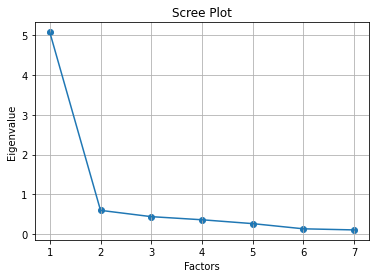

In [40]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
#factor의 갯수가 2를 넘어가는 것부터 그래프가 급격히 완만해짐 

In [41]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)
# 2번째 요소부터 0.8을 넘음 

분산 설명 비율:
 [0.7239424  0.08600366 0.06347042 0.05227198 0.03847325 0.0198987
 0.01593959]
누적 분산 설명 비율:
 [0.7239424  0.80994605 0.87341647 0.92568846 0.96416171 0.98406041
 1.        ]


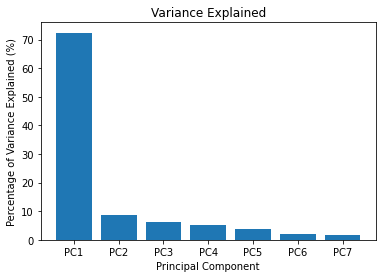

In [42]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [43]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.8 이상
print('적합한 PC 개수:', d) # 2개 선택 

적합한 PC 개수: 2


In [44]:
# PCA 진행
pca = PCA(n_components=2,random_state=312) # n_components를 재설정
X_p = pca.fit_transform(data_scale)

In [45]:
# 각 PC를 이루는 변수들의 조합 구성 (7X2): Eigen Vector
pd.DataFrame(pca.components_.T, 
             columns = ['PC1','PC2'], 
             index=data2.columns)

,PC1,PC2
X1,0.393381,-0.362250
X2,0.387966,-0.419181
X3,0.366728,-0.396609
X4,0.407480,0.106709
X5,0.334655,0.616291
X6,0.372860,0.236743
X7,0.378399,0.297515


In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7239424 , 0.80994605])

In [47]:
X_pp = pd.DataFrame(X_p, 
                    columns = ['PC1','PC2'], 
                    index = data[['COUNTRY']])
X_pp


,PC1,PC2
"(Argentina,)",0.402878,0.392932
"(Australia,)",-1.963795,0.256650
"(Austria,)",-1.363940,0.230305
"(Belgium,)",-1.432760,-0.148813
"(Bermuda,)",0.224472,0.799457
"(Brazil,)",-0.262240,0.722989
"(Burma,)",1.647630,-0.545064
"(Canada,)",-2.434590,0.440359
"(Chille,)",-0.469583,-0.026892
"(China,)",0.623488,-0.916730


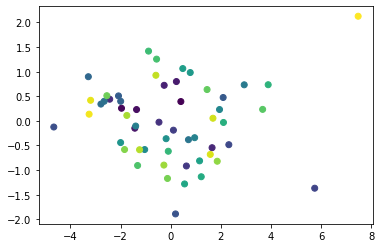

In [48]:
# Principal Component Pattern Plot 1
X_pp2 = pd.DataFrame(X_p, 
                    columns = ['PC1','PC2'], 
                    index = data2.index)

plt.scatter(x=X_pp2['PC1'],y=X_pp2['PC2'], c=X_pp2.index)
# 주 성분의 갯수가 2개이기 때문에 3d projection 은 필요 없었다. 

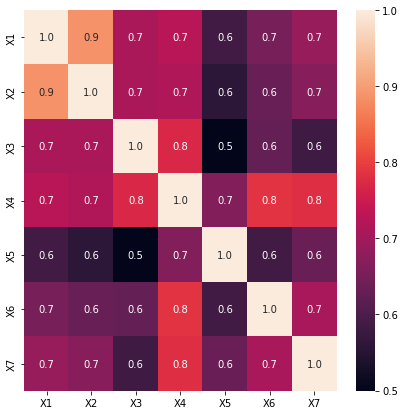

In [49]:
# correlation 
corr = data2.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt='.1f')
# 혹시 몰라 변수들끼리의 상관계수를 체크해봤고 0.5 이상의 값을 갖고 있어 다들 양호한 편이었다. 

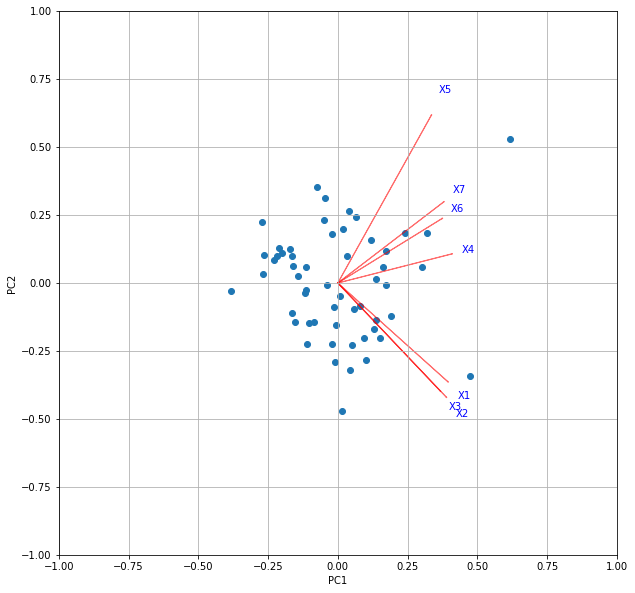

In [50]:
def biplot(score,coeff,pcax,pcay,labels=None):
  plt.figure(figsize=(10,10))

  pca1=pcax-1
  pca2=pcay-1
  xs = score.iloc[:,pca1]
  ys = score.iloc[:,pca2]
  n=coeff.shape[0]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='b', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i+1], color='b', ha='center', va='center')
  plt.xlim(-1,1) # 범위는 최대 1에서 최소 -1
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

biplot(X_pp, pca.components_.T, 1, 2, labels=data.columns)

#bi-plot은 각 개체들의 제1주성분(행), 제2주성분(열) 값을 시각화 한 것으로, 화살표는 원변수와 PC의 상관계수를 나타낸다.
# PC와 평행할수록 해당 PC에 큰 영향을 미치며, 화살표 벡터의 길이가 원변수의 분산을 표현하여, 길수록 분산이 크다



---

---

---

---

---

---

---


🍀 FA (Factor Analyzer)

In [ ]:
from google.colab import files
myfile = files.upload()
data = pd.read_csv('women_track_records.csv')
data.head()

Saving women_track_records.csv to women_track_records (1).csv


,COUNTRY,X1,X2,X3,X4,X5,X6,X7
0,Argentina,11.61,22.94,54.50,2.15,4.43,9.79,178.52
1,Australia,11.20,22.35,51.80,1.98,4.13,9.08,152.37
2,Austria,11.43,23.09,50.62,1.99,4.22,9.34,159.37
3,Belgium,11.41,23.04,52.00,2.00,4.14,8.88,157.85
4,Bermuda,11.46,23.05,53.30,2.16,4.58,9.81,169.98


In [ ]:
data= data.drop(data.iloc[:,:1], axis=1)
data.dropna(inplace=True)
data

,X1,X2,X3,X4,X5,X6,X7
0,11.61,22.94,54.50,2.15,4.43,9.79,178.52
1,11.20,22.35,51.80,1.98,4.13,9.08,152.37
2,11.43,23.09,50.62,1.99,4.22,9.34,159.37
3,11.41,23.04,52.00,2.00,4.14,8.88,157.85
4,11.46,23.05,53.30,2.16,4.58,9.81,169.98
5,11.31,23.17,52.80,2.10,4.49,9.77,168.75
6,12.14,24.47,55.00,2.18,4.45,9.51,191.02
7,11.00,22.25,50.60,2.00,4.06,8.81,149.45
8,12.00,21.52,54.90,2.05,4.23,9.37,171.38
9,11.95,24.41,54.97,2.08,4.33,9.31,168.48


In [ ]:
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)

In [ ]:
data_scale.cov() # 공분산행렬

,X1,X2,X3,X4,X5,X6,X7
X1,1.018519,0.903792,0.722910,0.740792,0.596882,0.662284,0.701505
X2,0.903792,1.018519,0.723413,0.729917,0.568975,0.644783,0.682428
X3,0.722910,0.723413,1.018519,0.786167,0.508911,0.641282,0.593351
X4,0.740792,0.729917,0.786167,1.018519,0.677082,0.799606,0.794198
X5,0.596882,0.568975,0.508911,0.677082,1.018519,0.598333,0.648205
X6,0.662284,0.644783,0.641282,0.799606,0.598333,1.018519,0.720960
X7,0.701505,0.682428,0.593351,0.794198,0.648205,0.720960,1.018519


- Bartlett Test
  - 요인분석 모형의 적합성 여부 검정 (H0: 상관관계 행렬이 단위행렬이다)
    - 카이제곱 분포를 이용해 검정
  - 귀무가설이 기각되어야 (p-value <= 0.05) 요인분석 모델 사용가능

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(320.54483603212043, 2.0547220429172287e-55)

- KMO Test (Kaiser-Meyer-Olkin Test)
  - 변수들간 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값 (관측된 모든 변수 간 분산 비율)
    - 입력 변수들 간 상관계수제곱들과 편상관계수제곱들을 모두 더한 값 중에서 상관계수제곱의 합이 차지하는 비율 값
  - 이 값이 작으면 요인분석을 위한 변수들의 선정이 적절하지 못하다는 것을 의미
  - 일반적으로 0.9 이상이면 아주 좋음, 0.8 이상이면 꽤 좋음, 0.7 이상이면 적당함, 0.6 이상이면 평범함, 0.5 미만이면 안 좋음
  - 변수가 최소 3개 이상일 경우 사용 가능

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.8 이상이므로 꽤 좋음

0.8866604207395923

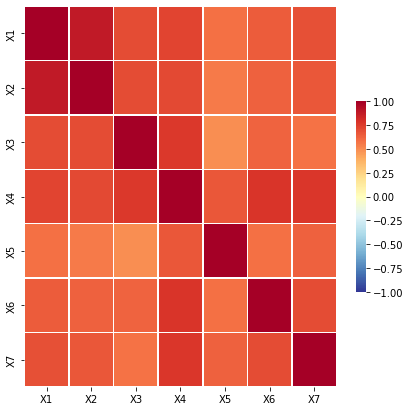

In [ ]:
fig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(data_scale.corr(), 
            cmap = 'RdYlBu_r', 
            # annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=6, rotation = "varimax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

- Factor analysis (FA): 요인 적재량은 각 변수와 요인 간의 관계 정도를 나타내는 값으로, 일종의 회귀계수
  - 일반적으로 0.3 이상이면 유의미한 관계가 있다고 볼 수 있음
  - 제곱 값은 회귀계수의 결정계수($R^2$)와 같음 -> 해당 변수를 해당 요인이 얼마나 잘 설명해주는가

In [ ]:
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
X1,0.411768,0.797432,0.304062,0.026673,-0.032304,-0.038886
X2,0.369352,0.799855,0.326817,0.019193,0.030416,0.037540
X3,0.319975,0.478581,0.640946,0.027383,-0.016630,-0.005609
X4,0.663995,0.332928,0.626284,-0.033256,0.022401,0.010129
X5,0.629403,0.321309,0.224680,-0.046974,-0.104991,-0.004691
X6,0.637407,0.321965,0.416057,0.189456,0.016808,-0.000412
X7,0.741425,0.388788,0.250027,0.023348,0.097398,0.002025


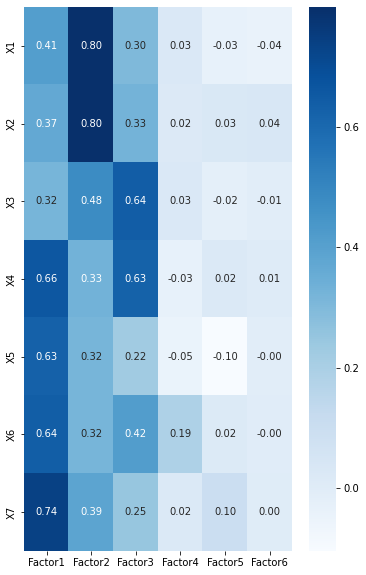

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

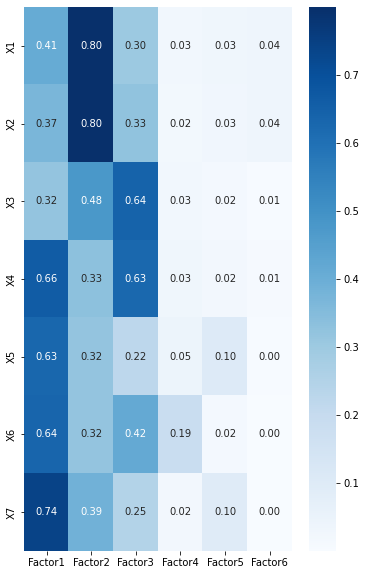

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

In [ ]:
# 최종 요인 3개 선택
fa = FactorAnalyzer(n_factors=3, rotation = "varimax")
fa.fit(data_scale)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa_result_loading_final = pd.DataFrame(fa.loadings_, 
                                       columns = ['Factor1', 'Factor2', 'Factor3'],
                                       index=data_scale.columns)
fa_result_loading_final

,Factor1,Factor2,Factor3
X1,0.418314,0.799231,0.308710
X2,0.387729,0.776162,0.339613
X3,0.344853,0.444523,0.681370
X4,0.708719,0.321595,0.564582
X5,0.617477,0.323272,0.211429
X6,0.659534,0.320757,0.380313
X7,0.752962,0.386612,0.220773


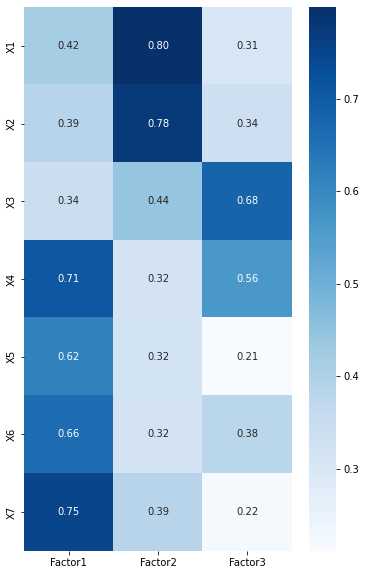

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_final, cmap="Blues", annot=True, fmt='.2f')

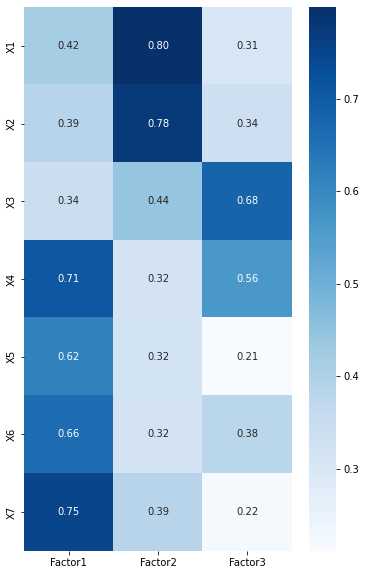

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading_final), cmap="Blues", annot=True, fmt='.2f') # 절대값으로 확인

## Step 4. Results

In [ ]:
fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3
SS Loadings,2.329743,1.899083,1.231738
Proportion Var,0.332820,0.271298,0.175963
Cumulative Var,0.332820,0.604118,0.780081


In [ ]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:5], 
                    columns = ['ji','ho','ean'], 
                    index = data_scale.index)
X_ff

,ji,ho,ean
0,0.577055,-0.735794,0.604558
1,-0.456914,-0.794366,-0.355860
2,-0.262464,-0.096776,-0.867447
3,-0.505929,-0.179907,-0.407463
4,0.734937,-0.997987,0.525149
5,0.435833,-0.901064,0.173722
6,0.400720,0.804865,0.368573
7,-0.257417,-1.275201,-0.323853
8,-0.155614,-0.145213,0.065548
9,-0.509931,0.980266,0.197385


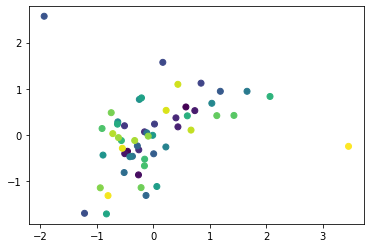

In [ ]:
# Score Plot 1
plt.scatter(x=X_ff['ji'],y=X_ff['ean'], c=X_ff.index)

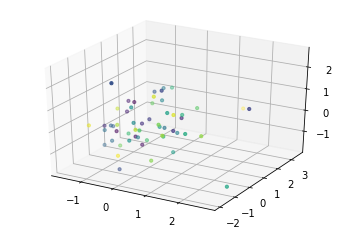

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_ff['ho'],X_ff['ji'],X_ff['ean'], s=10, c = X_ff.index)
plt.show()